# Regressie en correlatie

In [1]:
# Library om YouTube videos te importeren 

from IPython.display import YouTubeVideo, Image

## 1 Correlaties

### 1.1 Terugblik op correlaties

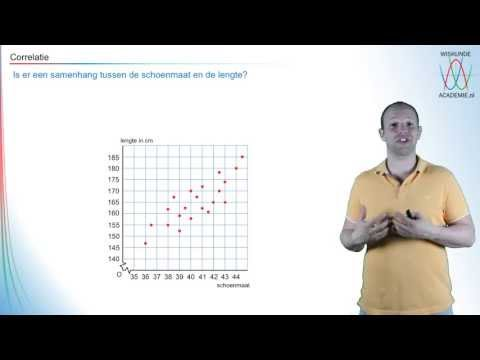

In [2]:
YouTubeVideo("FvZw74gz0Aw", width=800, height=500)

In de notebook van beschrijvende statistiek hebben we een blik geworpen op correlaties. Hoewel dit eigenlijk geen onderdeel is van beschrijvende statistiek, hoort dit ook binnen **'exploratory data analysis'** (het verkennen van de data), net als beschrijvende statistiek zelf. 

Met correlaties kijken we of er een **lineair** verband is tussen twee variabelen. Het is gebruikelijk om hier de Pearson correlatiecoëfficiënt voor te gebruiken. Deze coëfficiënt loopt van -1 tot +1. Een coëfficiënt met een waarde die dichtbij de +1 ligt, duidt op een sterke positieve correlatie. Vice versa, een coëfficiënt die dichtbij de -1 ligt, duidt op een sterke negatieve correlatie. Een coëfficiënt dichtbij de 0 duidt op een zwakke correlatie (of geen verband). 

Dit geldt overigens alleen voor lineaire verbanden. Het is namelijk best mogelijk dat twee variabelen een sterke relatie hebben, maar dat dit geen lineaire relatie is. Hierdoor kan de correlatie coëfficiënt dichtbij 0 zijn, terwijl het (non-lineaire) verband wel sterk is. 

**Waarschuwing!** Als twee variabelen een statistisch verband hebben, betekent het niet dat deze ook een **causaal** verband hebben. [Deze website](https://www.tylervigen.com/spurious-correlations) heeft een aantal grappige voorbeelden van sterke relaties, maar welke niet aan elkaar gerelateerd zijn. 

### 1.2 Bepalen van de Pearson correlatie coëfficiënt

De Pearson correlatie coëfficiënt tussen twee variabelen $x$ en $y$ wordt bepaald met de onderstaande formule.

Het sigma symbool($\Sigma$) geeft aan dat de som van alle waarden berekend moet worden

In [3]:
Image(url='https://cdn.wallstreetmojo.com/wp-content/uploads/2019/09/Pearson-Correlation-Coefficient-Formula.jpg.webp', width=600)

We gaan een voorbeeld bekijken. Hiervoor gebruiken we [California Housing Dataset](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html). Om de code te runnen moet je de [Scikit-learn](https://scikit-learn.org/stable/) en de [Seaborn](https://seaborn.pydata.org/) libraries geïnstalleerd hebben.

In [4]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

We beginnen met het importeren van de dataset als een pandas dataframe.

In [5]:
housing_df = datasets.fetch_california_housing(as_frame=True)

In tegenstelling tot het importeren van CSV-bestanden, zoals we tot nu toe hebben gedaan, geeft deze import ons twee objecten. Een dataframe genaamd "data" waarin verschillende kenmerken staan. Daarnaast is er ook een series genaamd "targets" waarin de mediane huizenprijzen worden gegeven, per honderdduizend dollar (\$100,000).

In [6]:
display(housing_df.data.head()) #hiermee selecteren we de specifieke dataset 'data'

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
display(housing_df.target.head()) #hiermee selecteren we de specifieke series 'target'

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

Ons doel is om te bepalen of er een verband is tussen de mediane inkomens (MedInc) en de mediane huizenprijzen (target). We beginnen met het maken van een nieuwe dataframe, waar we de kenmerken en de huizenprijzen combineren. Dit maakt het uitvoeren van een correlatie analyse gemakkelijker. 

Our goal is to determine whether there is a relationship between median incomes (MedInc) and median house prices (target). We start by creating a new dataframe, where we combine the characteristics and the house prices. This makes performing a correlation analysis easier.

In [8]:
combined_df = housing_df.data.copy()
combined_df["Prices"] = housing_df.target.copy()
display(combined_df.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Prices
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


We beginnen met een visualisatie van onze data, dit kan ons namelijk al veel vertellen. We doen dit met een scatterplot (puntenwolk grafiek).

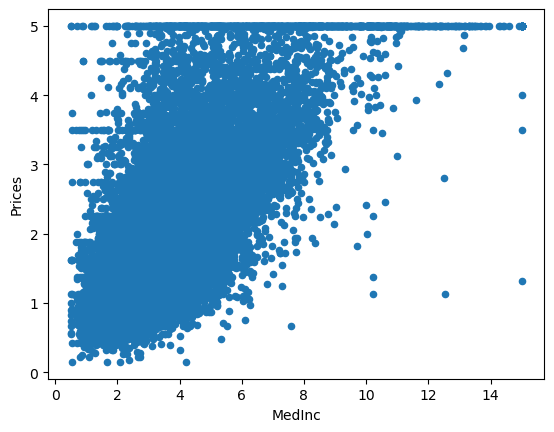

In [9]:
combined_df.plot.scatter('MedInc', 'Prices')
plt.show()

Er is een positieve correlatie te zien. Wanneer de mediane inkomens (x-as) omhoog gaat, stijgen de mediane huizenprijzen (y-as) ook.

We gaan nu de Pearson correlatie coëfficiënt bepalen. Om dit wat overzichtelijker te maken, creëren we een nieuw datafarame en hernoemen we onze variabelen naar $x$ en $y$. Zo kan je zien dat de code hetzelfde doet als de bovenstaande formule. 

A positive correlation can be seen. When median incomes (x-axis) go up, median home prices (y-axis) also go up.

We are now going to determine the Pearson correlation coefficient. To make this a bit clearer, we create a new data framework and rename our variables to $x$ and $y$. So you can see that the code does the same as the above formula.

In [10]:
# nieuw dataframe maken
calculation_df = pd.DataFrame()
calculation_df['x'] = combined_df["MedInc"].copy()
calculation_df['y'] = combined_df["Prices"].copy()
display(calculation_df.head())

# extra kolommen die $x**2$, $y**2$ en het product van $x$ en $y$ bevatten
calculation_df[r'$x^2$'] = np.square(calculation_df['x'])
calculation_df[r'$y^2$'] = np.square(calculation_df['y'])
calculation_df[r'$x * y$'] = calculation_df['x'] * calculation_df['y']
display(calculation_df.head())

# met behulp van de som ($\Sigma$) van de kolommen bepalen we de teller (numerator) en noemer (denominator) van de formule.
n = len(calculation_df)
numerator = n * sum(calculation_df[r'$x * y$']) - sum(calculation_df['x'])*sum(calculation_df['y'])
denominator = np.sqrt((n * sum(calculation_df[r'$x^2$']) - (sum(calculation_df['x']))**2) * (n * sum(calculation_df[r'$y^2$']) - (sum(calculation_df['y']))**2) )
corr_coeff = numerator/denominator
display(corr_coeff)

,x,y
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,5.6431,3.413
4,3.8462,3.422


,x,y,$x^2$,$y^2$,$x * y$
0,8.3252,4.526,69.308955,20.484676,37.679855
1,8.3014,3.585,68.913242,12.852225,29.760519
2,7.2574,3.521,52.669855,12.397441,25.553305
3,5.6431,3.413,31.844578,11.648569,19.259900
4,3.8462,3.422,14.793254,11.710084,13.161696


0.6880752079584824

Dit geeft een gematigd-sterke positieve correlatie tussen de twee variabelen. 
Dit was erg veel wiskunde.. Gelukkig hoeven we deze stappen niet elke keer te herhalen, Numpy heeft hier een functie voor.

In [11]:
corr_coeff_np = np.corrcoef(calculation_df['x'], calculation_df['y'])
print(corr_coeff_np)

[[1.         0.68807521]
 [0.68807521 1.        ]]


Wanneer je de correlatie tussen meerdere variabelen wilt toetsen, kun je een kruistabel (matrix) maken met behulp van pandas:

In [12]:
display(combined_df.corr())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Prices
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Prices,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


De bovenstaande matrix laat de correlatie coëfficiënt tussen alle numerieke kolommen zien. Uiteraard zijn sommige waardes hier niet waardevol voor ons (bijv. de relatie tussen Latitude/Longitude en de huizenprijzen).

Een visueel aantrekkelijkere manier om dit te laten zien, is met behulp de Seaborn library. Hieronder zie je een heatmap van de correlatie coëfficiënten.

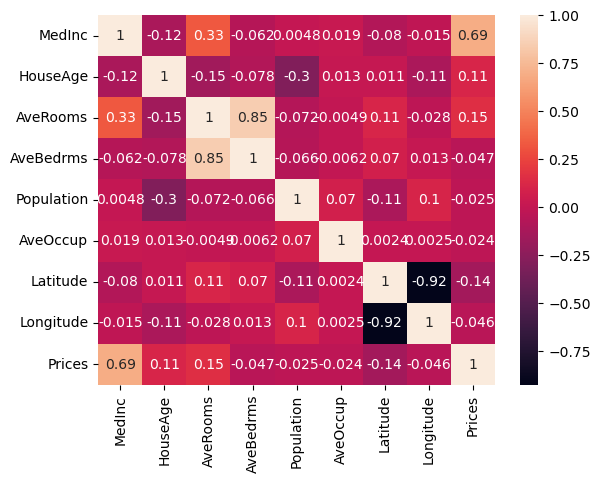

In [13]:
sns.heatmap(combined_df.corr(), annot=True)
plt.show()

## 2 Regressie

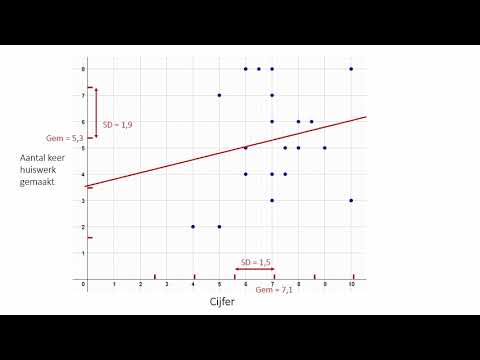

In [14]:
YouTubeVideo("Ig4nx5bpNqw", width=800, height=500)

### 2.1 Concept en definitie

Regressie is een statistische techniek die de relatie tussen variabelen modeleerd. Hierbij gaat het om de relatie tussen de **afhankelijke** variabele (target) en één of meerdere **onafhankelijke** variabelen (features). Wanneer we een wiskundig model hebben van deze relatie, kunnen we voorspellingen doen voor de target variabele op basis van de features. 

Stel we hebben een regressie model die de relatie tussen schoenmaat (target) en lichaamslengte (feature) beschrijft. We kunnen dit model dan gebruiken om de schoenmaat van een persoon te voorspellen op basis van hun lichaamslengte:

Hiervoor gebruiken we een dataset van "[Height and shoe size](https://osf.io/ja9dw/)". We beginnen met het laden beschrijven van de dataset

In [15]:
height_shoe_df = pd.read_csv('wo_men.csv')
display(height_shoe_df)

,time,sex,height,shoe_size
0,04.10.2016 17:58:51,woman,160.0,40.0
1,04.10.2016 17:58:59,woman,171.0,39.0
2,04.10.2016 18:00:15,woman,174.0,39.0
3,04.10.2016 18:01:17,woman,176.0,40.0
4,04.10.2016 18:01:22,man,195.0,46.0
...,...,...,...,...
96,17.10.2016 12:37:09,woman,170.0,39.0
97,17.10.2016 13:12:48,woman,183.0,39.0
98,19.10.2016 17:07:53,woman,173.0,40.0
99,29.10.2016 20:28:33,woman,160.0,37.0


In [16]:
display(height_shoe_df.describe())

,height,shoe_size
count,100.000000,100.00000
mean,165.233800,39.77500
std,39.817544,5.55613
min,1.630000,35.00000
25%,163.000000,38.00000
50%,168.500000,39.00000
75%,174.250000,40.00000
max,364.000000,88.00000


Hier vallen wat dingen op. Zoals de minimale/maximale lengte en maximale schoenmaat. Ook is de standaard deviatie van de lengte aan de hoge kant. We gaan de data visualiseren.

A few things stand out here. Such as the minimum/maximum height and maximum shoe size. The standard deviation of the length is also on the high side. We are going to visualize the data.

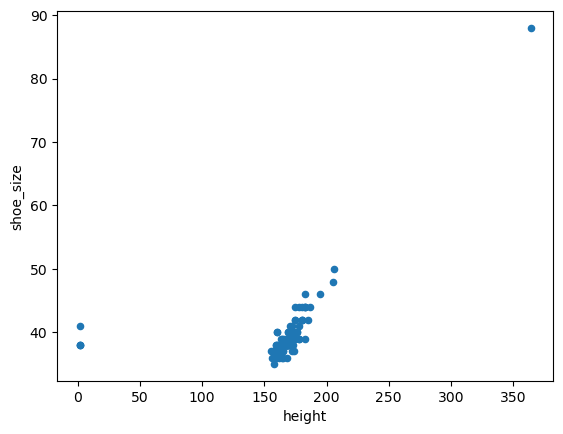

In [17]:
height_shoe_df.plot.scatter(x='height', y='shoe_size')
plt.show()

Doordat we een visualisatie hebben gemaakt, zien we direct waar de extreme waardes zitten in onze dataset. Een perfect voorbeeld van hoe je beschrijvende statistiek toepast. We gaan een aantal rijen verwijderen. We kiezen hiervoor de afkapwaarden van 100cm en 250cm. 

Because we have made a visualization, we immediately see where the extreme values are in our dataset. A perfect example of how to apply descriptive statistics. We are going to delete some rows. We choose the cut-off values of 100cm and 250cm for this.

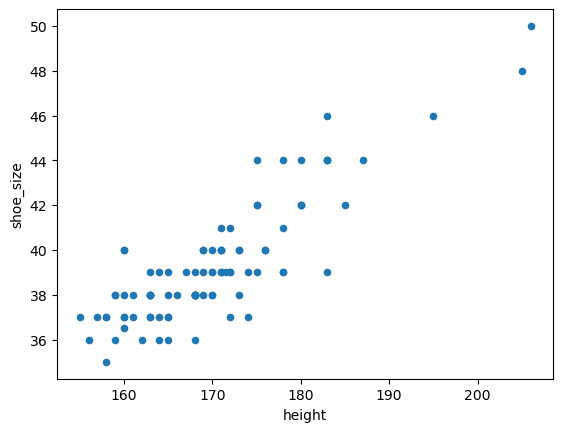

In [18]:
height_shoe_df_clean = height_shoe_df[(height_shoe_df['height'] > 100) & (height_shoe_df['height'] < 250)]
height_shoe_df_clean.plot.scatter(x='height', y='shoe_size')
plt.show()

Hier zien we een duidelijke relatie tussen onze twee variabelen. Op het oog zien we dat het gaat om een positieve correlatie, om te bepalen hoe sterk dit verband is, gaan we de Pearson correlatie coëfficiënt berekenen:

Here we see a clear relationship between our two variables. At first glance we see that it is a positive correlation, to determine how strong this relationship is, we will calculate the Pearson correlation coefficient:

In [19]:
height_shoe_corr = np.corrcoef(height_shoe_df_clean['height'], height_shoe_df_clean['shoe_size'])[0,1]
print(height_shoe_corr)

0.8612402455211137


Een sterke positieve relatie! We gaan nu een regressiemodel maken op basis van deze data, zodat we voor een nieuw persoon waarvan we de lengte hebben gemeten, een voorspelling kunnen maken van de schoenmaat. Een lineair model ziet er als volgt uit:
$y = b_0 + b_1 x$

Waarbij 'x' de onafhankelijke variabele is (lichaamslengte) en 'y' de afhankelijke (schoenmaat). 
$b_0$  en $b_1$ worden de parameters van het model genoemd. Dit zijn de waarden die wij moeten bepalen om het meest nauwkeurige model te maken.

Probeer eens door het invullen van willkeurige getallen een lijn te plotten door de scatterplot heen. Middels trial and error kan je een redelijke schatting maken van de lijn. 

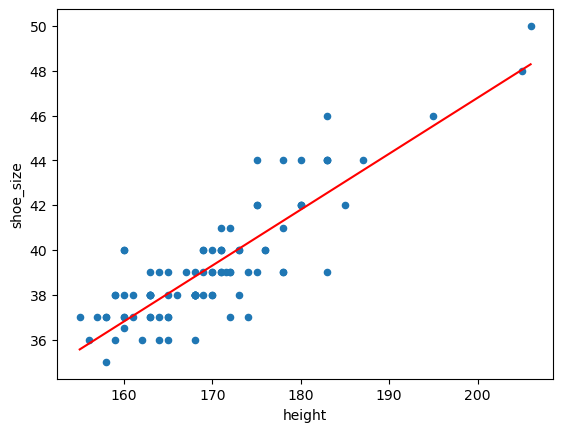

In [20]:
# Run deze cell met verschillende waarden voor b_0 en b_1 om te kijken of je een goede fit kan vinden voor onze scatterplot

# b_0: dit is de snijpunt die de lijn heeft met de y-as, dus waar de x-waarde 0 is.
b_0 = -3.13

# b_1: dit is de richtingscoëfficiënt van de lijn, dus hoe stijl de lijn loopt.
b_1 = 0.2496


# Deze code zorgt voor het plotje. Verander hier niks aan!
def trial_error_model(x):
    y = b_0 + b_1 * x
    return y

xrange = np.linspace(min(height_shoe_df_clean['height']), max(height_shoe_df_clean['height']), num=100)

yrange = [trial_error_model(h) for h in xrange]

height_shoe_df_clean.plot.scatter(x='height', y='shoe_size')
plt.plot(xrange, yrange, 'r-')
plt.show()

### 2.2 RMSE and $R^2$

Er zijn verschillende manieren om op kwantitatieve wijze iets te zeggen over hoe goed ons model fit over de data. Twee hiervan gaan we behandelen, namelijk "Root Mean Squared Error" (RMSE) en de "verklaarde variantie" ($R^2$).

Als eerste de RMSE. We beginnen met de nauwkeurigheid, deze bepaal je door het verschil tussen de voorspelling van de target en de daadwerkelijke target waarde te berekenen. Dit doe je voor elke feature waarde (x-as). In de scatterplot zien we dat iemand met een lengte van circa 195cm een schoenmaat heeft van 46. Op basis van het model kan je achterhalen wat de voorspelde schoenmaat is voor iemand die 195cm lang is. Je berekend dus tussen deze twee waarden het verschil. Als je dit voor elke waarde doet krijg je een rij aan verschillen (errors). Je zal misschien geneigd zijn om het gemiddelde van deze errors te berekenen voor de totale nauwkeurigheid, maar dan zullen **de positieve en negatieve waarden elkaar opheffen**. We gaan daarom eerst alle errors kwadrateren (tot de macht twee), waarna we het gemiddelde van deze waarden berekenen, en daar vervolgens de wortel van. De waarde die je overhoud is de **Root Mean Squared Error (RMSE)**.

$RMSE = \sqrt{\frac{\sum_{i=1}^n(y - y_{pred})}{n}}$

Vervolgens kijken we naar de verklaarde variantie ($R^2$ ). Dit is een statistische maat die het aantal van de variantie voor een afhankelijke variabele (target) weergeeft dat wordt verklaard door de onafhankelijke variabele (feature). De formule is als volgt:

$R^2 = 1 - \frac{\sum_{i=1}^n(y - y_{pred})^2}{\sum_{i=1}^n(y - \bar{y})^2}$

Ook hier zien we dat er verschil wordt gemaakt door de voorspelde target waarde ($y_{pred}$) en de (gemiddelde) daadwerkelijke target waarde ($\bar{y}$). Deze waarde loopt van 0 tot 1 en als je deze waarden vermenigvuldigd met 100, is de verklaarde variantie te interpreteren als percentage: voor hoeveel procent verklaard lichaamslengte de schoenmaat. Een waarde in de buurt van 1 houdt in dat veel van de datapunten dichtbij de regressielijn zitten, en vice versa met een waarde dichtbij de 0. 

| <img src="https://slideplayer.com/slide/15055251/91/images/3/Explained+Variability+-+illustration.jpg" alt="$R^2$" width="600" height="600"/> |
| --- |
| <center>An illustration of high and low $R^2$. Source: https://slideplayer.com/slide/15055251/</center> |

Laten we de RMSE en $R^2$ waarden voor het model die je net, op basis van trial and error, hebt gemaakt gaan bepalen

In [21]:
# De daadwerkelijke waarden voor de target
y = height_shoe_df_clean['shoe_size']

# De voorspelde waarden voor de target
y_pred = trial_error_model(height_shoe_df_clean['height'])

# De RMSE
RMSE = np.sqrt(np.mean(np.square(y - y_pred)))

# De R2 waarde
R2 = 1 - (np.sum(np.square(y - y_pred))) / (np.sum(np.square(y - np.mean(y))))

print(f"Voor onze trial and error model hebben we een RMSE waarde van: {RMSE} en een R2 waarde van: {R2}")

Voor onze trial and error model hebben we een RMSE waarde van: 1.3785991455860283 en een R2 waarde van: 0.741734228312015


### 2.3 Lineaire regressie in Python:

Tot nu toe heb je trial en error gebruikt om een lineair model te maken op basis van de data. Echter, als data scientisten willen we een model creëren op basis van machine learning technieken. Een van de eenvoudige methoden om een lineair regressie model te maken is met de "Ordinary Least Squares" methode. Hier komen we in het volgende notebook (lineaire algebra) op terug. Voor nu gebruiken we de [scikit-learn](https://scikit-learn.org/stable/) library om een lineair model te maken en de resultaten te visualiseren.

Coëfficiënt b_0: 
 -3.133275090526716

Coëfficiënt b_1: 
 0.24963077750193707

Root mean squared error: 1.38
Verklaarde variantie: 0.74


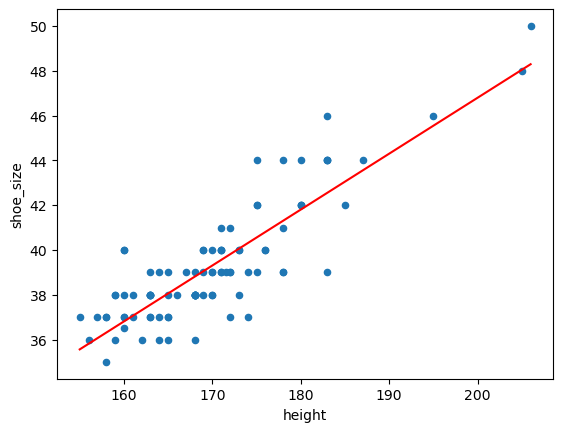

In [22]:
# Import de Linear Regression class van scikit-learn
from sklearn.linear_model import LinearRegression

X = height_shoe_df_clean['height'].values
y = height_shoe_df_clean['shoe_size'].values

# Sklearn verwacht een multidimensionale array voor X, dus vormen we onze 1D array om.
X = X.reshape(-1, 1)


# Import de RMSE en R2 functies
from sklearn.metrics import mean_squared_error, r2_score

# Gebruik de class om een model de fitten op onze data
reg = LinearRegression().fit(X, y)

# Print de coëfficiënten van ons lineair model 
print("Coëfficiënt b_0: \n", reg.intercept_)
print("\nCoëfficiënt b_1: \n", float(reg.coef_))

# Voorspel de target waarden (schoenmaat) met behulp van ons model
y_pred = reg.predict(X)

# De root mean squared error (RMSE)
print("\nRoot mean squared error: %.2f" % mean_squared_error(y, y_pred, squared=False))
# De verklaarde variantie
print("Verklaarde variantie: %.2f" % r2_score(y, y_pred))

# visualisatie van het model
y_model = reg.predict(xrange.reshape(-1,1))

height_shoe_df_clean.plot.scatter(x='height', y='shoe_size')
plt.plot(xrange, y_model, 'r-')
plt.show()

Hoe nauwkeurig was jouw model ten opzichte van het model op basis van machine learning?

### 2.4 Meervoudige lineaire regressie

Tot nu toe hebben we lineaire regressies gezien met 1 feature (x) en 1 target (y). We kunnen ook een model maken waarbij de target variabele een lineair verband heeft met meerdere features en dus afhankelijk is van deze features. De formule voor zo'n model is vergelijkbaar met die we hiervoor hebben gezien:

So far we have seen linear regressions with 1 feature (x) and 1 target (y). We can also make a model in which the target variable has a linear relationship with several features and is therefore dependent on these features. The formula for such a model is similar to the one we saw above:

$y = b_0 + b_1 x_1 + b_2 x_2 + b_3 x_3 + \cdots$ 

Wanneer we een lineair model toepassen op multivariate data, moeten we dus de waarden voor de volgende coëfficiënten bepalen: $b_0$, $b_1$, $b_2$ etc.

We gaan dit toepassen bij de California Housing Dataset.

So when we apply a linear model to multivariate data, we need to determine the values for the following coefficients: $b_0$, $b_1$, $b_2$, etc.

We're going to apply this to the California Housing Dataset.

In [23]:
display(housing_df.data.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


We gaan een lineaire regressie toepassen met de features hierboven, om zo de huizenprijzen (target) te voorspellen. Dit doen we door gebruik te maken van sci-kit learn linear regression functie. Voordat we de functie uitvoeren zijn er een aantal zaken waar we rekening mee moeten houden. Dit zijn tevens vragen die jij jezelf **moet** stellen wanneer je een machine learning model aan het trainen bent.

We are going to apply a linear regression with the features above to predict house prices (target). We do this by using sci-kit learn linear regression function. Before we execute the function, there are a number of things that we need to take into account. These are also questions you should ask yourself when you are training a machine learning model.

**1. Kan ik alle features van mijn dataset gebruiken?**

Voordat we een model trainen, moeten we de features vaak nog bewerken (preprocessing). Hier ga je meer over leren bij de machine learning en deep learning modules. Aangezien we nu een lineaire regressie toepassen, vraag jezelf af of elke feature hiervoor geschikt is: op basis van het datatype en of het relevant is om een lineair verband te trekken tussen de features en de huizenprijzen.

Je ziet bijvoorbeeld dat twee features latitude en longitude zijn. We kunnen hier geen lineair verband met huizenprijzen op afleiden. Een latitude van 20 graden is niet 2 keer zo belangrijk als een latitude van 10 graden, of een longitude van 5 graden draagt niet twee keer zo weinig bij voor de prijs van een huis ten opzichte van een longitude van 10 graden.  Aangezien lineaire verbanden hier betekenisloos zijn, verwijderen we deze kolommen van onze dataset.

In latere modules gaan we ook naar technieken kijken om deze features toch in ons model op te nemen, maar voor nu verwijderen we ze. 

**1. Can I use all features of my dataset?**

Before we train a model, we often have to edit the features (preprocessing). You will learn more about this in the machine learning and deep learning modules. Since we now apply a linear regression, ask yourself whether each feature is suitable for this: based on the data type and whether it is relevant to draw a linear relationship between the features and house prices.

For example, you can see that two features are latitude and longitude. We cannot derive a linear relationship with house prices from this. A 20-degree latitude is not twice as important as a 10-degree latitude, or a 5-degree longitude does not contribute twice as little to the price of a house relative to a 10-degree longitude. Since linear relationships are meaningless here, we remove these columns from our dataset.

In later modules we will also look at techniques to include these features in our model, but for now we will remove them.

In [24]:
# Hhousing dataset features en targets
X = housing_df.data.drop(columns=['Latitude', 'Longitude'])
y = housing_df.target

**2. Ben ik mijn model aan het trainen en testen op verschillende data?**

Dit is een belangrijke vraag. Als jij je model op specifieke data traint, dan bestaat de kans dat je model 'overfit.' Het is daarom gebruikelijk om een **training set** en een **test set** te maken. De data (rijen) die je gebruikt om je model te trainen is ongeveer 70\% tot 80\%. De overige data kun je gebruiken om je model te testen. Je data opsplitsen kan met behulp van de [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) method.


2. Am I training and testing my model on different dates?
This is an important question. If you train your model on specific data, there is a chance that your model will 'overfit.' It is therefore common to create a training set and a test set. The data (rows) you use to train your model is about 70% to 80%. You can use the remaining data to test your model. You can split your data using the train_test_split method.

In [25]:
from sklearn.model_selection import train_test_split

# Gebruik 80% van je data als training data en 20% als test data
# Gebruik random_state randomiseren om reproduceerbaarheid te garanderen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

We hebben nu onze test en training dataset voor de features en target. We kunnen nu het model maken.

In [26]:
# Maak een model op basis van de training set
house_reg = LinearRegression().fit(X_train, y_train)

# Achterhaal de coëffciënten van ons model
print("Coëfficiënten: \n", house_reg.coef_)
print("\nConstante(b_0): \n", house_reg.intercept_)

# We gaan nu voorspellingen doen voor de huizenprijzen, we gebruiken hier dus onze test data voor
y_pred = house_reg.predict(X_test)

# We kunnen nu de nauwkeurigheid van ons model toetsen
# Root mean squared error
print("\nRoot mean squared error: %.2f" % mean_squared_error(y_test, y_pred, squared=False))
# Verklaarde variantie
print("Verklaarde variantie: %.2f" % r2_score(y_test, y_pred))

Coëfficiënten: 
 [ 5.40711717e-01  1.67154846e-02 -2.19428299e-01  1.10229965e+00
  2.57856950e-05 -4.38764024e-03]

Constante(b_0): 
 -0.5469981052548771

Root mean squared error: 0.79
Verklaarde variantie: 0.53


We gaan nu de voorspelde prijzen en de daadwerkelijke prijzen bekijken:

,True Price,Predicted Price
20046,0.47700,1.005790
3024,0.45800,1.561570
15663,5.00001,2.666241
20484,2.18600,2.640496
9814,2.78000,1.979880


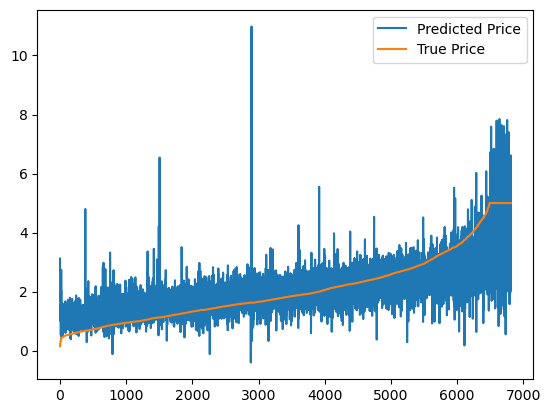

In [27]:
results_df = pd.DataFrame()
results_df['True Price'] = y_test
results_df['Predicted Price'] = y_pred
display(results_df.head())
results_df = results_df.sort_values(by = 'True Price').reset_index(drop=True)
results_df.plot(kind = 'line', y = ['Predicted Price','True Price'])
plt.show()

Middels deze visualisatie zien we dat de voorspelde huizenprijzen ook een positieve stijging hebben, net als de daadwerkelijke waarden, maar we zien wel dat er veel random uitschieters zijn. Zou jij dit model gebruiken om huizenprijzen te voorspellen?

## 3 Opdrachten

Je gaat nu toepassen wat je hebt geleerd. De dataset die we gebruiken bevat variabelen over fysieke karakteristieken van proefpersonen die een bepaalde oefening doen, dit zijn de features. Onze target data bevat het aantal calorieën die ze verband hebben. 

Het is aan jou om een lineair regressie model te maken op de dataset om de verbrande calorieën te voorspellen, op basis van de fysieke karakteristieken.

In [28]:
exercise_data = pd.read_csv( 'exercise.csv' )
calories_data = pd.read_csv( 'calories.csv' )
joined_data = exercise_data.join( calories_data.set_index( 'User_ID' ), on='User_ID', how='left')

X = joined_data.drop(columns=['User_ID', 'Calories'])
y = joined_data['Calories']

### Vraag 1: Kan je alle variabelen van de features direct gebruiken voor een lineair regressie model? Waarom wel/niet? Is er een manier om ze allemaal bruikbaar te maken? Zo ja, bewerk deze variabele(n) dan zodat je ze kan gebruiken in je model.

### Question 1: Can you use all feature variables directly for a linear regression model? Why/why not? Is there a way to make them all usable? If so, edit these variable(s) so that you can use them in your model.

In [29]:
## Your code here


display(calories_data.head(), X.head(), exercise_data.head())

df_tr = exercise_data.merge(exercise_data, how='right').merge(calories_data, how='right')

display(df_tr.head(), df_tr.shape)




,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,male,68,190.0,94.0,29.0,105.0,40.8
1,female,20,166.0,60.0,14.0,94.0,40.3
2,male,69,179.0,79.0,5.0,88.0,38.7
3,female,34,179.0,71.0,13.0,100.0,40.5
4,female,27,154.0,58.0,10.0,81.0,39.8


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


(15000, 9)

### Vraag 2: 'Split' de data in een training- en test set

### Question 2: 'Split' the data into a training and test set

In [30]:
## Typ hier je code

training = df_tr

test = df_tr



### Vraag 3: Vanaf hier gebruiken we alleen de trainingset, tenzij anders wordt vermeld. Maak 3 á 4 visualisaties van jouw data om inzicht te krijgen in het verband tussen de features en de target.

### Question 3: From here on we only use the training set unless otherwise stated. Make 3 to 4 visualizations of your data to gain insight into the relationship between the features and the target.

<AxesSubplot:xlabel='Heart_Rate', ylabel='Duration'>

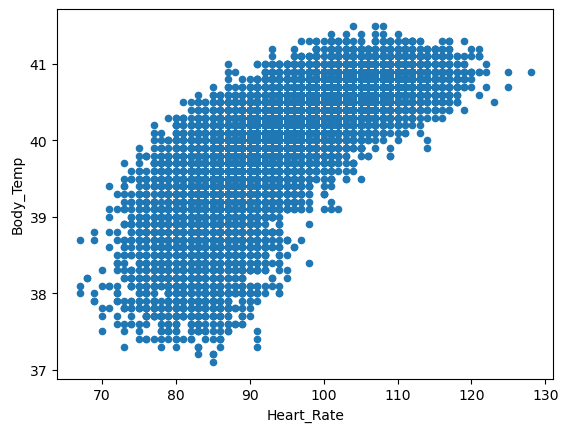

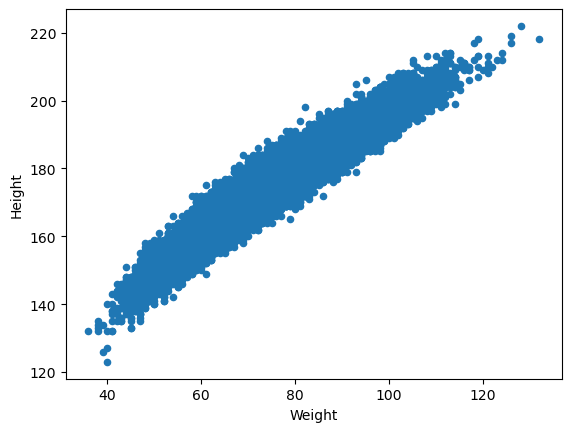

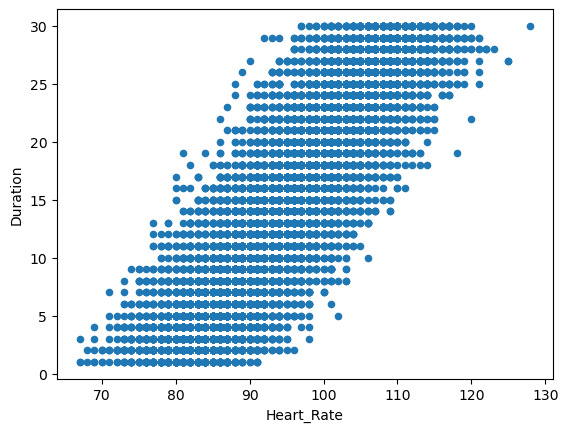

In [31]:
## Typ hier je code

training.plot.scatter('Heart_Rate', 'Body_Temp')
training.plot.scatter('Weight', 'Height')
training.plot.scatter('Heart_Rate', 'Duration')


<AxesSubplot:xlabel='Duration', ylabel='Body_Temp'>

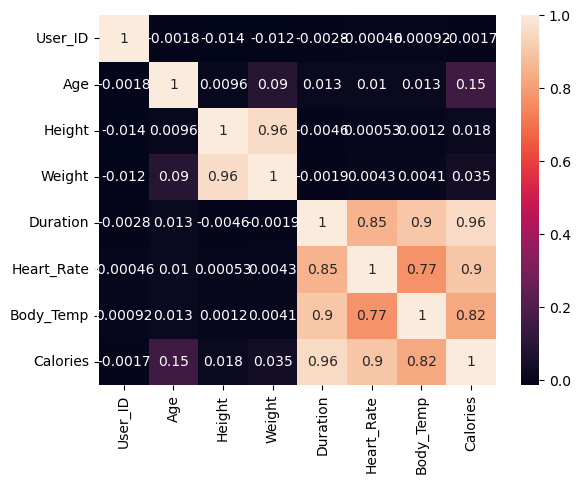

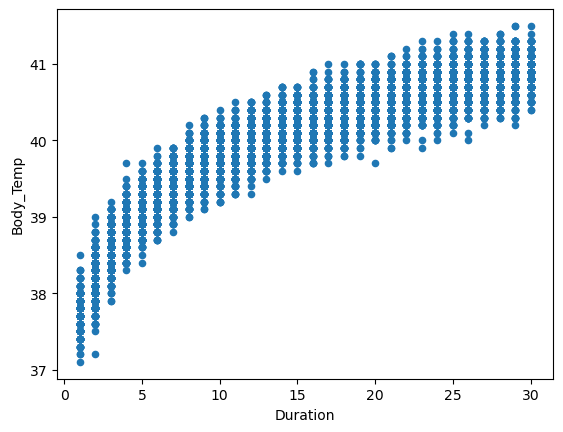

In [32]:
sns.heatmap(training.corr(), annot=True)

training.plot.scatter('Duration', 'Body_Temp')

### Vraag 4: Bepaal de correlatiematrix van de features. Welke van deze hebben de sterkste relatie? Is dit iets wat je verwacht?

### Question 4: Determine the correlation matrix of the features. Which of these have the strongest relationship? Is this something you expect?

<AxesSubplot:xlabel='Height', ylabel='Weight'>

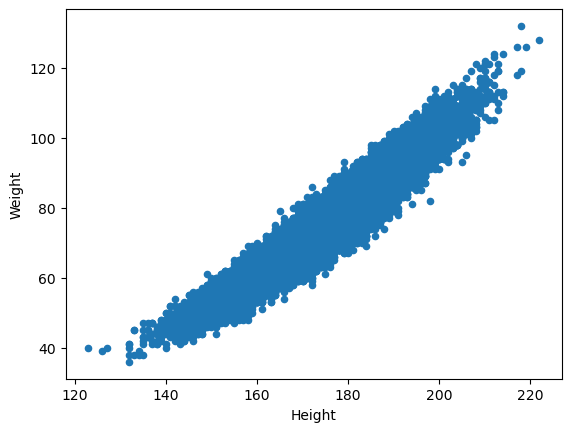

In [33]:
## Typ hier je code

training.plot.scatter('Height', 'Weight')


### Vraag 5: Bepaal de Pearson correlatie coëfficiënt tussen de volgende variabelen:

### a) Duur en calorieën
### b) Hartslag en calorieën
### c) Lichaamstemperatuur en calorieën

### Question 5: Determine the Pearson correlation coefficient between the following variables:

### a) Duration and calories
### b) Heart rate and calories
### c) Body temperature and calories

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


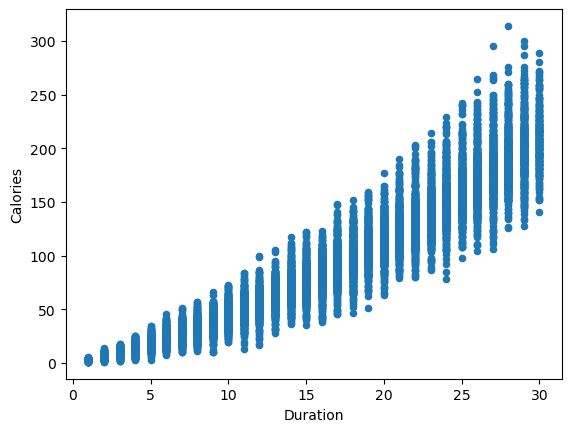

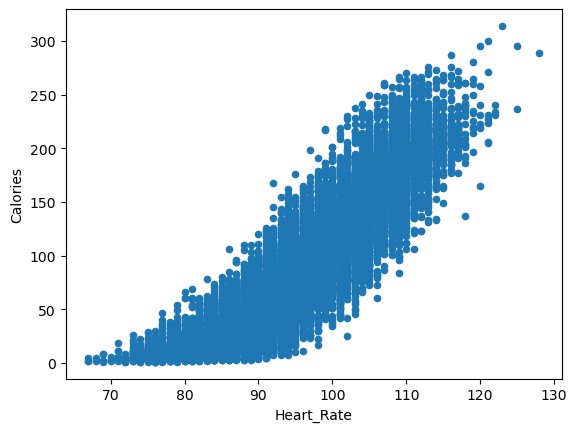

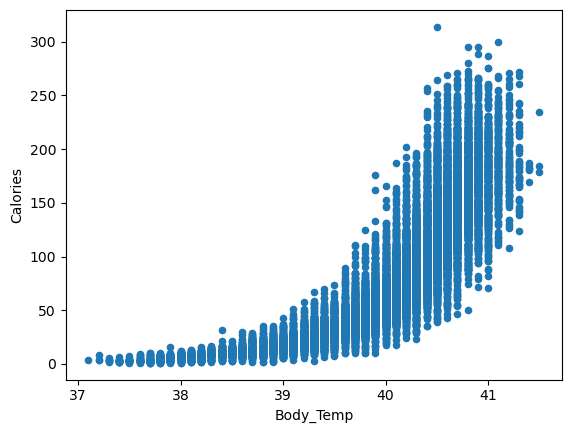

In [34]:
## Typ hier je code

training.plot.scatter('Duration', 'Calories')

training.plot.scatter('Heart_Rate', 'Calories')

training.plot.scatter('Body_Temp', 'Calories')


training.head()
    


In [35]:
# Determine the Pearson correlation coefficient between the following variables:
# a) Duration and calories
# b) Heart rate and calories¶
# c) Body temperature and calories




# np.corrcoef(training['Heart_Rate'], training['Calories'])
# np.corrcoef(training['Body_Temp'], training['Calories'])


# training_list=['Duration', 'Heart_Rate', 'Body_Temp']

# for i in training_list:
#     print(np.corrcoef(training[i], training['Calories']))


#     print(i) 


# def func_corrcoef():
    
#     for i in training_list:
#         print(np.corrcoef(training[i], training['Calories']))
        
#     return result

# print(func_corrcoef)


# def cor_columns(col):
#     cor=[]
#     for i in cols:
#         cor.append(round(np.corrcoef(X_train[i], y_train)[0][1],2))
#     df_cors = pd.DataFrame(data{})...............



### Vraag 6: Maak een model met de dataset om de calorieën te voorspellen.

### Question 6: Make a model with the dataset to predict the calories.

In [36]:
## Typ hier je code



### Vraag 7: Wat zijn de coëfficiënten uit jouw model? Welke variabele heeft de meeste/minste impact op het verbanden van calorieën?

### Question 7: What are the coefficients from your model? Which variable has the most/least impact on calorie burn?

In [37]:
## Your code here

### Vraag 8: Gebruik nu je model om een voorspelling te doen van de calorieën van jouw test dataset.

### Question 8: Now use your model to predict the calories of your test dataset.

In [38]:
## Typ hier je code

### Vraag 9: Wat is de root mean squared error van jouw model? 

### Question 9: What is the root mean squared error of your model?

In [39]:
## Typ hier je code

### Vraag 10: Wat is de verklaarde variantie? 
### Question 10: What is the explained variance?

In [40]:
## Typ hier je code

### Vraag 11: Op basis van jouw exploratory data anlysis, visualisaties en eigen inzicht: Wat zou je kunnen doen om jouw voorspelling te verbeteren met deze dataset?

### Question 11: Based on your exploratory data analysis, visualizations and your own insight: What could you do to improve your prediction with this dataset?